<a href="https://colab.research.google.com/github/Ahtesham519/jupyter-notebook_python/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

###Lets Load Databases

In [ ]:
from sklearn.datasets import load_diabetes

In [ ]:
diabetes_all_data = load_diabetes()

In [ ]:
labels = diabetes_all_data.target

In [ ]:
#feature names

feature_names = diabetes_all_data.feature_names
print('feature names' , feature_names)

#features
features = diabetes_all_data.data
df = pd.DataFrame(features,columns = feature_names)
df

feature names ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


Dataset Exploration

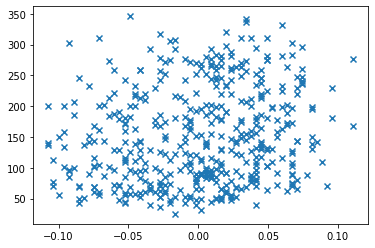

In [ ]:
plt.scatter(df["age"] , labels, marker='x')

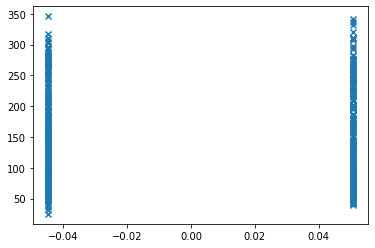

In [ ]:
plt.scatter(df["sex"] , labels, marker = 'x')

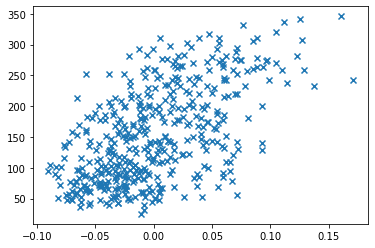

In [ ]:
plt.scatter(df["bmi"], labels , marker = 'x')

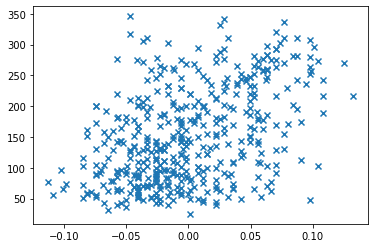

In [ ]:
plt.scatter(df["bp"] ,labels, marker ='x')

In [ ]:
df['labels' ] = labels

Alternatively, find correlation

In [25]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000


In [26]:
df = df.iloc[:,:-1]  #remove the labels cols again

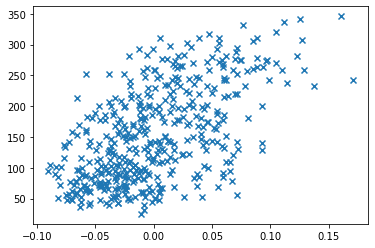

In [27]:
plt.scatter(df["bmi"] , labels , marker = 'x')

Hypothsis

In [28]:
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5'], dtype='object')

In [29]:
bmi = df['bmi']

In [30]:
_bmi_nor = (bmi - min(bmi)) / (max(bmi) - min(bmi)) #normalization is very useful usually

In [31]:
_labels_nor = (labels - min(labels)) /(max(labels) - min(labels)) #not nessary usually 

Train/Test split

In [32]:
x_train , x_test , y_train,y_test = train_test_split(_bmi_nor, _labels_nor, test_size=.3 , random_state =32)

In [33]:
y_train.shape

(309,)

In [34]:
x_train.shape

(309,)

In [35]:
y_test

array([0.31464174, 0.38006231, 0.12461059, 0.42679128, 0.44548287,
       0.35202492, 0.72897196, 0.14953271, 0.43925234, 0.47663551,
       0.20560748, 0.7788162 , 0.95638629, 0.04361371, 0.34267913,
       0.11838006, 0.19626168, 0.20249221, 0.16199377, 0.17445483,
       0.39563863, 0.57320872, 0.14330218, 0.43302181, 0.49844237,
       0.49844237, 0.63862928, 0.72897196, 0.84735202, 0.79750779,
       0.55140187, 0.35514019, 0.3894081 , 0.20249221, 0.        ,
       0.11214953, 0.32398754, 0.69781931, 0.32087227, 0.21183801,
       0.62305296, 0.31152648, 0.20249221, 0.21495327, 0.38317757,
       0.48909657, 0.37071651, 0.2741433 , 0.29906542, 0.57009346,
       0.40186916, 0.3894081 , 0.47663551, 0.3894081 , 0.45794393,
       0.26168224, 0.3894081 , 0.26168224, 0.65420561, 0.08411215,
       0.7788162 , 0.2741433 , 0.54517134, 0.36448598, 0.26479751,
       0.46417445, 0.30529595, 0.19626168, 0.16199377, 0.07165109,
       0.88785047, 0.46417445, 0.89096573, 0.78193146, 0.01869

In [36]:
x_test

149    0.326446
314    0.500000
214    0.219008
95     0.123967
19     0.276860
         ...   
409    0.301653
108    0.520661
172    0.619835
386    0.190083
18     0.305785
Name: bmi, Length: 133, dtype: float64

finding the Parameters(thetas in our hypothesis

(-0.05, 1.05) (-0.010747663551401873, 1.0481308411214953)


Text(0, 0.5, 'Disease Prog')

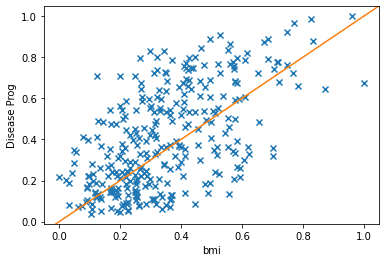

In [39]:
theta = np.array([1,0])  #our guess for the params , guess from hit and trail 
plt.scatter(x_train , y_train, marker = 'x')
xlim, ylim = (plt.gca().get_xlim() , plt.gca().get_ylim())
print(xlim , ylim)
plt.plot(xlim , [theta[0]*xlim[0]+theta[1] , theta[0]*xlim[1] +theta[1]] ,'C1')
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel("bmi")
plt.ylabel("Disease Prog")

Analytic Gradient Desecent

In [40]:
X = np.array([x_train, np.ones(len(x_train))]).T 
print(X.shape)
y = y_train
computed_theta = np.linalg.solve(X.T @ X, X.T @ y) #soleve the nomal equation above to find

(309, 2)


In [41]:
computed_theta #Actual values.Close to our guess

array([0.77890484, 0.1318822 ])

(-0.05, 1.05) (-0.010747663551401873, 1.0481308411214953)


Text(0, 0.5, 'Disease Prog')

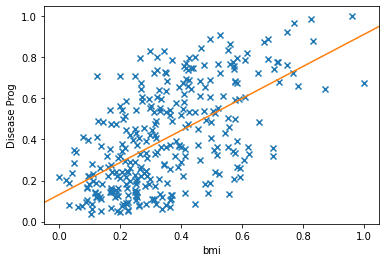

In [42]:
theta = np.array([1,0]) #our guess for params
theta = computed_theta #overwrite guess with theta that minimizes error.
plt.scatter(x_train, y_train , marker ='x')
xlim , ylim = (plt.gca().get_xlim() , plt.gca().get_ylim())
print(xlim, ylim)
plt.plot(xlim , [theta[0] *xlim[0] +theta[1] , theta[0] *xlim[1] +theta[1]] ,'C1')
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel("bmi")
plt.ylabel("Disease Prog")

Exercise

In [43]:
x_test

149    0.326446
314    0.500000
214    0.219008
95     0.123967
19     0.276860
         ...   
409    0.301653
108    0.520661
172    0.619835
386    0.190083
18     0.305785
Name: bmi, Length: 133, dtype: float64

In [44]:
y_test

array([0.31464174, 0.38006231, 0.12461059, 0.42679128, 0.44548287,
       0.35202492, 0.72897196, 0.14953271, 0.43925234, 0.47663551,
       0.20560748, 0.7788162 , 0.95638629, 0.04361371, 0.34267913,
       0.11838006, 0.19626168, 0.20249221, 0.16199377, 0.17445483,
       0.39563863, 0.57320872, 0.14330218, 0.43302181, 0.49844237,
       0.49844237, 0.63862928, 0.72897196, 0.84735202, 0.79750779,
       0.55140187, 0.35514019, 0.3894081 , 0.20249221, 0.        ,
       0.11214953, 0.32398754, 0.69781931, 0.32087227, 0.21183801,
       0.62305296, 0.31152648, 0.20249221, 0.21495327, 0.38317757,
       0.48909657, 0.37071651, 0.2741433 , 0.29906542, 0.57009346,
       0.40186916, 0.3894081 , 0.47663551, 0.3894081 , 0.45794393,
       0.26168224, 0.3894081 , 0.26168224, 0.65420561, 0.08411215,
       0.7788162 , 0.2741433 , 0.54517134, 0.36448598, 0.26479751,
       0.46417445, 0.30529595, 0.19626168, 0.16199377, 0.07165109,
       0.88785047, 0.46417445, 0.89096573, 0.78193146, 0.01869

In [45]:
#add bias
_x_test = np.array([x_test, np.ones(len(x_test))]).T

In [46]:
#Let's predict label of example at index 0 in test set
example_0 = _x_test[0]
example_0   #observe 1 (as mentioned before , this i will simply our work by automatically handling)


array([0.32644628, 1.        ])

In [47]:
hypo = computed_theta * example_0
hypo   #slope multiplied by example_0 and intercept as it is (multiplied by 1 ) .add these next

array([0.25427059, 0.1318822 ])

In [50]:
predicted_label = hypo.sum()
predicted_label #this is the predicted label


0.3861527881352883

In [51]:
y[0]

0.2398753894080997

In [52]:
y[2]

0.12149532710280374

In [53]:
y[34]

0.14641744548286603

In [54]:
y[5]

0.12461059190031153

In [56]:
y[5]

0.12461059190031153

Finding parameters using sklearn

In [57]:
reg = LinearRegression(fit_intercept=False)
reg.fit(X,y)
#return (reg,reg.coef_)
reg.coef_

array([0.77890484, 0.1318822 ])

In [58]:
type(reg) #a_base.LinearRegression model which you also use to make prediction

sklearn.linear_model._base.LinearRegression